In [143]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bmcs_cross_section.api import AnaFRPBending

# Making home directory if it doesn't exist to save the data in local disc
home_dir = Path().home()
ml_data = home_dir / 'ml_data'
if not ml_data.exists():
    ml_data.mkdir()

## Visualization of the admissible design space for defined moment capacity
### a. 3D_scatted visualization of the design space classified by different reinforcment ratios 

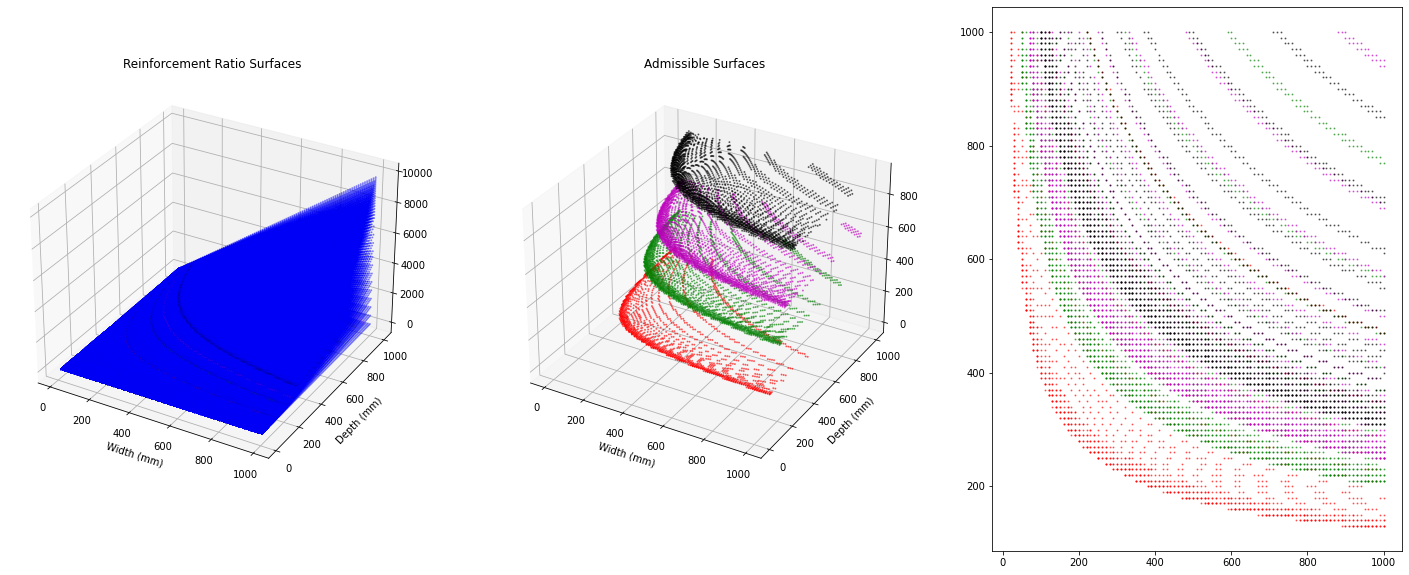

In [145]:
Design_space = np.load(ml_data / 'designspace_meshgrid_data.npz')
M_u = np.load(ml_data / 'Ana_TTC_M_u.npy')

def plot_points_within_tolerance(Design_space, Mu, target_Mu, tolerance, plot_step_reinforcement_ratio, colors, ax1, ax2, ax3):
    for i in np.unique(Design_space[:, 0])[::plot_step_reinforcement_ratio]:
        subset_indices = Design_space[:, 0] == i
        subset = Design_space[subset_indices][:, 1:]
        z_values = Mu[subset_indices]
        for index, target_z_value in enumerate(target_Mu):
            within_tolerance = np.isclose(z_values, target_z_value, rtol=tolerance)
            colors_temp = [colors[index] if val else 'b' for val in within_tolerance]
            target_z_value_indices = np.where(within_tolerance)[0]
            ax1.scatter(subset[:, 0], subset[:, 1], z_values, color=colors_temp, alpha=0.1, s=1)
            ax2.scatter(subset[target_z_value_indices, 0], subset[target_z_value_indices, 1], z_values[target_z_value_indices], color=colors[index], alpha=0.5, s=1)
            ax3.scatter(subset[target_z_value_indices, 0], subset[target_z_value_indices, 1], color=colors[index], alpha=0.5, s=1)

data = np.load(ml_data / 'designspace_meshgrid_data.npz')
M_u = np.load(ml_data / 'Ana_TTC_M_u.npy')
rho_mesh, b_mesh, d_mesh = data['rho_mesh'], data['b_mesh'], data['d_mesh']

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
axes = [ax1, ax2, ax3]

titles = ['Reinforcement Ratio Surfaces', 'Admissible Surfaces']
for ax, title in zip(axes, titles):
    ax.set_xlabel('Width (mm)')
    ax.set_ylabel('Depth (mm)')
    ax.set_title(title)

rho_mesh, b_mesh, d_mesh = Design_space['rho_mesh'], Design_space['b_mesh'], Design_space['d_mesh']
Design_space = np.hstack((rho_mesh.flatten()[:, np.newaxis], b_mesh.flatten()[:, np.newaxis], d_mesh.flatten()[:, np.newaxis]))
moment_capacity = M_u.flatten()
target_Mu = [150, 400, 600, 900]
tolerance = 0.02
plot_step_reinforcement_ratio = 10
colors = ['r', 'g', 'm', 'k']

plot_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, plot_step_reinforcement_ratio, colors, ax1, ax2, ax3)

plt.show()


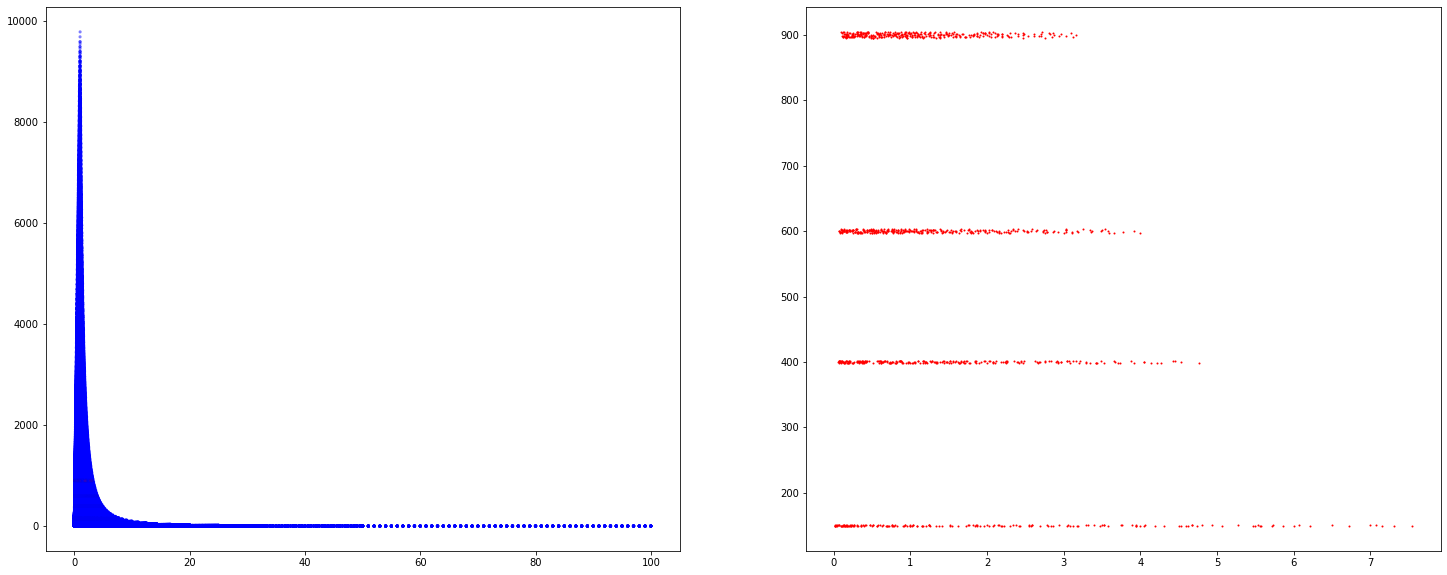

In [165]:
# check it for whole range of b/d  

def NOND_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, step_reinforcement, ax1, ax2):
    index=0
    for i in np.unique(Design_space[:, 0])[::step_reinforcement]:
        subset = Design_space[Design_space[:, 0] == i]
        z_values = np.array(moment_capacity[Design_space[:, 0] == i])
        for Mu in target_Mu:
            within_tolerance = np.isclose(z_values, Mu, rtol=tolerance)
            colors = ['red' if val else 'blue' for val in within_tolerance]
            red_indices = np.where(within_tolerance)[0]  # Get indices of red points
            # ax1 plots whole design space including inadmissible design space in blue and admissible in red
            ax1.scatter(subset[:, 1]/ subset[:, 2], z_values, label=f"Set {int(i)}", color=colors, alpha=0.1, s=5)
            # ax2 plots only the admissible design space linked by defined moment capacity in red
            ax2.scatter(subset[red_indices, 1]/ subset[red_indices, 2], z_values[red_indices], label=f"Set {int(i)}", color='red', alpha=1, s=1)
        # index += 1
        # if index == 50:
        #     break
    
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)    
        
Design_space = np.load(ml_data / 'designspace_meshgrid_data.npz')
M_u = np.load(ml_data / 'Ana_TTC_M_u.npy')
rho_mesh, b_mesh, d_mesh = Design_space['rho_mesh'], Design_space['b_mesh'], Design_space['d_mesh']
Design_space = np.hstack((rho_mesh.flatten()[:, np.newaxis], b_mesh.flatten()[:, np.newaxis], d_mesh.flatten()[:, np.newaxis]))
moment_capacity = M_u.flatten()
target_Mu = [150, 400, 600, 900]
tolerance = 0.005 # relative tolerance
plot_step_reinforcement_ratio = 20


NOND_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, plot_step_reinforcement_ratio, ax1, ax2)


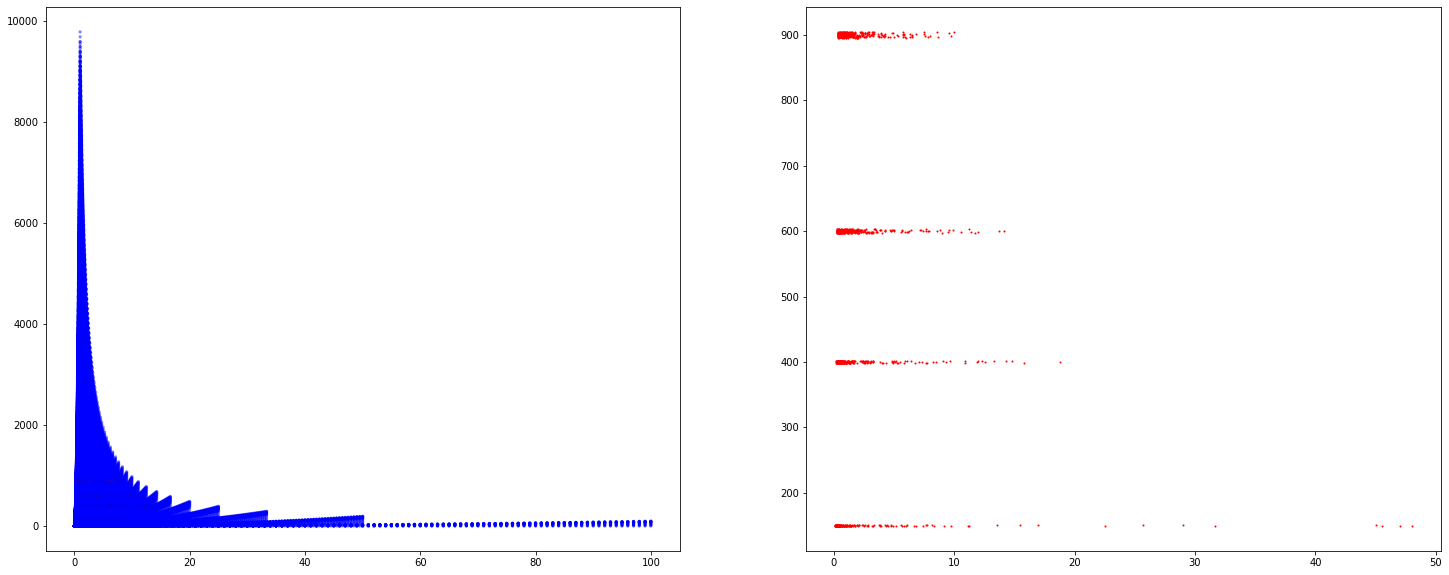

In [156]:

def NOND1_points_within_tolerance(Design_space, moment_capacity_normalized_min_max, target_z_value, tolerance, step_reinforcement, ax1, ax2):
    index=0
    for i in np.unique(Design_space[:, 0])[::step_reinforcement]:
        subset = Design_space[Design_space[:, 0] == i]
        z_values = np.array(moment_capacity_normalized_min_max[Design_space[:, 0] == i])
        for Mu in target_Mu:
            within_tolerance = np.isclose(z_values, Mu, rtol=tolerance)
            colors = ['red' if val else 'blue' for val in within_tolerance]
            red_indices = np.where(within_tolerance)[0]  # Get indices of red points
            # ax1 plots whole design space including inadmissible design space in blue and admissible in red
            ax1.scatter(subset[:, 2]/ subset[:, 1], z_values, label=f"Set {int(i)}", color=colors, alpha=0.1, s=5)
            # ax2 plots only the admissible design space linked by defined moment capacity in red
            ax2.scatter(subset[red_indices, 2]/ subset[red_indices, 1], z_values[red_indices], label=f"Set {int(i)}", color='red', alpha=1, s=1)
        # index += 1
        # if index == 50:
        #     break

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

Design_space = np.load(ml_data / 'designspace_meshgrid_data.npz')
M_u = np.load(ml_data / 'Ana_TTC_M_u.npy')
rho_mesh, b_mesh, d_mesh = Design_space['rho_mesh'], Design_space['b_mesh'], Design_space['d_mesh']
Design_space = np.hstack((rho_mesh.flatten()[:, np.newaxis], b_mesh.flatten()[:, np.newaxis], d_mesh.flatten()[:, np.newaxis]))
moment_capacity = M_u.flatten()
target_Mu = [150, 400, 600, 900]
tolerance = 0.005 # relative tolerance
plot_step_reinforcement_ratio = 20

NOND1_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, plot_step_reinforcement_ratio, ax1, ax2)
